In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression



df = pd.DataFrame(data = {
    'm2' : [100,150,120,300,230],
    'fiyat' : [75,90,95,120,110]
})


x = df.iloc[: , :-1].values #feature
y = df.iloc[:, -1].values #label

reg = LinearRegression().fit(x,y)

print(f"score: {reg.score(x,y)}")
print(f"bias: {reg.intercept_}")
print(f"weight: {reg.coef_}")

score: 0.8846581271568111
bias: 62.38848920863308
weight: [0.19784173]


In [ ]:
m2 = int(input("m2? "))
print(f"predicted: {reg.predict(np.array([[m2]]))}")

m2? 100
predicted: [82.17266187]


In [ ]:
100 * reg.coef_[0] + float(reg.intercept_) #validation

82.17266187050359

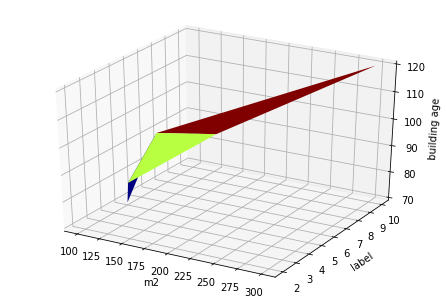

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

df = pd.DataFrame(data = {
    'm2':[100, 150, 120, 300, 230], 
    'building age':[5, 2, 6, 10, 3], 
    'label':[70, 90, 95, 120, 110]
    })

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(df['m2'], df['building age'], df['label'], cmap=cm.jet, linewidth=0.2)
ax.set_xlabel('m2')
ax.set_ylabel('label')
ax.set_zlabel('building age')
plt.show()

In [ ]:
df = pd.DataFrame(data = {
    'm2':[100, 150, 120, 300, 230], 
    'building age':[5, 2, 6, 10, 3], 
    'label':[70, 90, 95, 120, 110]
    })

X = df.iloc[: , :-1]
y = df.iloc[: , -1]

reg = LinearRegression().fit(X, y)

print(f"score: {reg.score(X, y)}")
print(f"weight: {reg.coef_}")
print(f"bias: {reg.intercept_}")

score: 0.8465258951131542
weight: [ 0.21520796 -0.15619124]
bias: 59.0747612003911


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.DataFrame(data = {
    'm2':[100, 150, 120, 300, 230], 
    'price':[70, 90, 95, 120, 110]
    })

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

reg = LinearRegression().fit(x, y)

err = 0
for idx in range(len(df)):
  actual_price = df.loc[idx]['price']
  m2 = df.loc[idx]['m2']

  predicted_price = reg.predict([[m2]])[0]

  print(f"actual price for {df.loc[idx]['m2']} : {actual_price}. predicted price: {predicted_price}. err: {actual_price - predicted_price}")
  err = actual_price - predicted_price

print(f"\nerr: {err}")

actual price for 100 : 70. predicted price: 80.02158273381295. err: -10.021582733812949
actual price for 150 : 90. predicted price: 90.63309352517986. err: -0.6330935251798593
actual price for 120 : 95. predicted price: 84.2661870503597. err: 10.733812949640296
actual price for 300 : 120. predicted price: 122.46762589928059. err: -2.4676258992805913
actual price for 230 : 110. predicted price: 107.61151079136691. err: 2.3884892086330893

err: 2.3884892086330893


In [ ]:
#mean absolute error (MAE)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

df = pd.DataFrame(data = {
    'm2':[100, 150, 120, 300, 230], 
    'building age':[5, 2, 6, 10, 3], 
    'price':[70, 90, 95, 120, 110]
    })

X = df.iloc[:,:-1].values # feature values (take columns until last column)
y = df.iloc[:,-1].values # label values (take only last column)

reg = LinearRegression().fit(X, y)

y_pred = []

for idx in range(len(df)):
  m2 = df.loc[idx]["m2"]
  building_age = df.loc[idx]["building age"]

  y_pred.append(reg.predict([[m2,building_age]]))


print(mean_absolute_error(y, y_pred))



5.173364755434096


In [ ]:
#mean squared error (MSE)

#mean absolute error (MAE)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.DataFrame(data = {
    'm2':[100, 150, 120, 300, 230], 
    'building age':[5, 2, 6, 10, 3], 
    'price':[70, 90, 95, 120, 110]
    })

X = df.iloc[:,:-1].values # feature values (take columns until last column)
y = df.iloc[:,-1].values # label values (take only last column)

reg = LinearRegression().fit(X, y)

y_pred = []

for idx in range(len(df)):
  m2 = df.loc[idx]["m2"]
  building_age = df.loc[idx]["building age"]

  y_pred.append(reg.predict([[m2,building_age]]))


print(mean_squared_error(y, y_pred))

45.42833504650633


train-test split

In [ ]:
#train-test split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.DataFrame(data = {'m2':[100, 150, 120, 300, 230, 175, 220, 270, 190, 220], 
                          'building age':[5, 2, 6, 10, 3, 7, 6, 8, 9, 4], 
                          'price':[70, 90, 95, 120, 110, 120, 95, 140, 220, 100]})

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#testize-> %20 test set 
#random state-> dağılım id'si??
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(X_train)

(8, 2)
(2, 2)
(8,)
(2,)
[[100   5]
 [120   6]
 [150   2]
 [220   4]
 [270   8]
 [300  10]
 [220   6]
 [230   3]]


train-test-validation split

In [ ]:
#train-test-validation split
df = pd.DataFrame(data = {'m2':[100, 150, 120, 300, 230, 175, 220, 270, 190, 220], 
                          'building age':[5, 2, 6, 10, 3, 7, 6, 8, 9, 4], 
                          'price':[70, 90, 95, 120, 110, 120, 95, 140, 220, 100]})

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=2)


print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

print(X_validation.shape)
print(y_validation.shape)

print(X_train)

(6, 2)
(2, 2)
(6,)
(2,)
(2, 2)
(2,)
[[220   6]
 [220   4]
 [300  10]
 [150   2]
 [270   8]
 [100   5]]
